<h3> Agenda </h3>

*   Use Pretrained Word Vectors
*   Use word vecotrs as feature for classification









In [3]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [4]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 KB 1.6 MB/s eta 0:00:001.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.3/922.3 KB 2.0 MB/s eta 0:00:002.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 KB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 1.8 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 2.6 MB/s eta 0:00:00


In [5]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [6]:
gensim.__version__

'4.3.2'

In [7]:
np.random.seed(42)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Use Pretrained Word Vectors

In [8]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [14]:
wv = api.load('glove-twitter-50')

In [15]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
# wv = api.load('word2vec-google-news-300')
# wv.save('/content/drive/MyDrive/Content Creation/Youtube Tutorials/vectors.kv')

In [12]:
wv['apple']

array([ 5.1418e-01, -1.9196e-01, -7.9963e-01,  9.1339e-01, -5.7061e-01,
        7.1746e-01, -5.8979e-01, -5.1530e-01,  1.3453e+00, -2.0792e-01,
        4.4555e-01,  2.4981e-01, -3.2020e+00,  3.5736e-01, -2.3593e-02,
       -3.1158e-02,  3.7782e-01,  6.4447e-01,  1.2056e+00, -1.0553e-01,
       -8.9697e-01, -7.9754e-01,  2.0239e-01, -1.0664e+00, -4.7167e-01,
       -2.5953e-01,  1.1328e-01, -3.8142e-01,  2.0366e-03, -5.0261e-01,
       -2.5197e-01, -8.4033e-02, -1.0015e+00, -8.6835e-01,  6.6201e-01,
        2.6496e-01,  2.2570e-01, -3.3847e-01, -3.4739e-01,  6.2199e-01,
       -1.3491e+00, -1.7497e-01, -1.1490e+00,  1.5144e-01,  1.1255e+00,
       -6.2668e-01, -3.4274e-01, -3.4938e-01, -1.0806e+00,  6.0174e-01],
      dtype=float32)

In [18]:
len(wv['apple'])

50

In [20]:
#from gensim.models import KeyedVectors
#wv = KeyedVectors.load('/content/drive/MyDrive/Content Creation/Youtube Tutorials/vectors.kv')

In [21]:
wv.similarity("apple", "mango")

0.5289788

In [22]:
wv.similarity("apple", "car")

0.51229525

In [23]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.48
'car'	'bicycle'	0.62
'car'	'airplane'	0.67
'car'	'cereal'	0.38
'car'	'communism'	0.01


In [24]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('truck', 0.8638960719108582), ('driving', 0.8150991797447205), ('airplane', 0.8137863278388977), ('parked', 0.8027330636978149), ('drove', 0.8020969033241272)]


In [25]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

sea


#### Semantic regularities captured in word embeddings

In [26]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('prince', 0.759779691696167),
 ('stone', 0.7595877051353455),
 ('queen', 0.754626989364624)]

In [27]:
wv.most_similar(positive=['woman', 'king'], topn=3)

[('guy', 0.8665385246276855),
 ('called', 0.8582760095596313),
 ('mother', 0.8502708077430725)]

In [28]:
words = ["one",'two','man','woman','table']

In [ ]:
# https://deepai.org/dataset/text8

In [29]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[-0.2804215 ,  1.5896978 ],
       [ 0.592398  ,  1.9831207 ],
       [-2.5777645 , -1.6972481 ],
       [-1.0547674 , -0.25685364],
       [ 3.3205552 , -1.6187173 ]], dtype=float32)

### Visualizing these word vectors

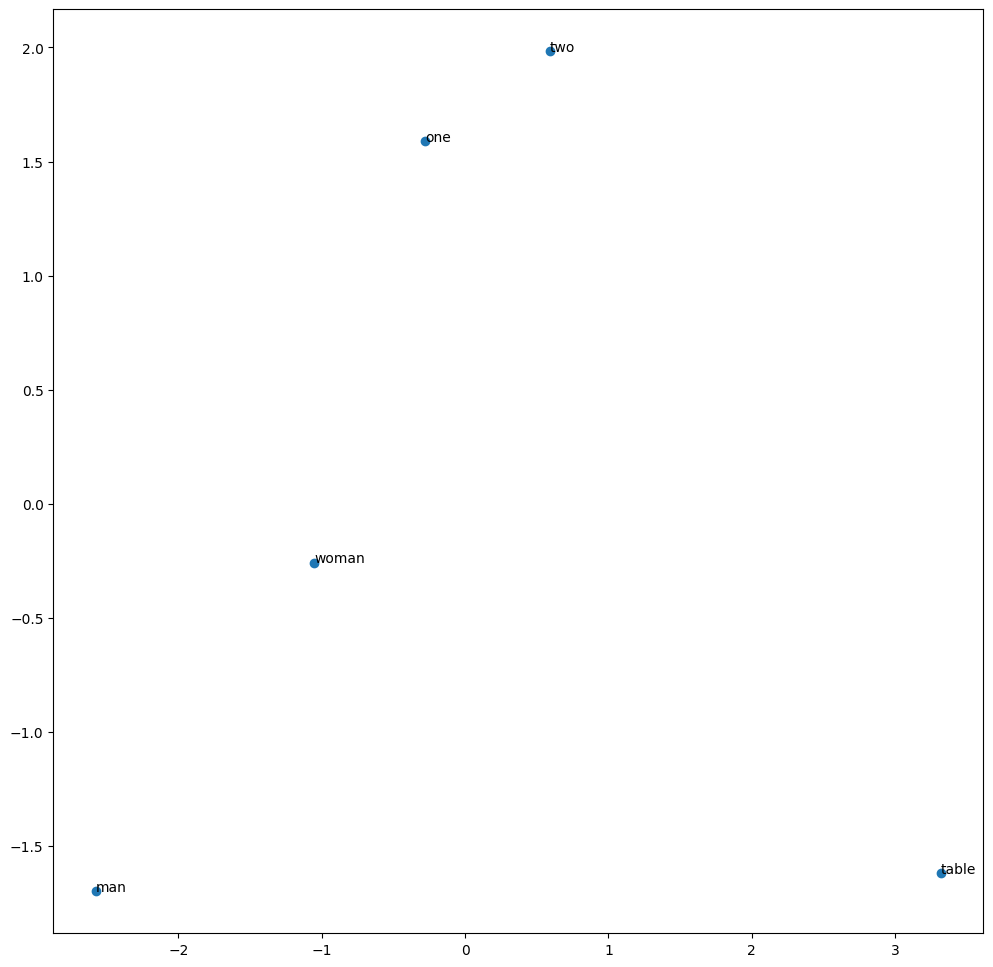

In [30]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Content Creation/Youtube Tutorials/datasets/toxic_commnets_500.csv",error_bad_lines=False, engine="python")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


comment_text  toxic
0  Your knowledge of Hebrew? Thank god that Jossi...      0
1  ==Tablighi Jamaat and allegations of terrorism...      0
2  "\nWell it's understandable not wanting the in...      0
3  "\n\n Please stop adding nonsense to Wikipedia...      0
4  Saint Petersburg\nPlease, leave the sister cit...      0

In [ ]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [ ]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)



    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
sent_vec("I am happy")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([-0.08447266,  0.10973685, -0.00453404,  0.18362863, -0.05944824,
       -0.04013497, -0.10041155,  0.03710938, -0.02503313,  0.04729353,
       -0.07543836, -0.16434152, -0.1116333 ,  0.02915737, -0.12290737,
        0.10421317, -0.00425502,  0.27535575, -0.01681083, -0.08075387,
       -0.26747349, -0.07281712,  0.08138602, -0.02498954, -0.05358887,
       -0.07969884, -0.30385045,  0.10531616, -0.03756278, -0.04029192,
        0.06455776, -0.02200753, -0.11361694, -0.12702288, -0.19824219,
        0.06921387, -0.14557757,  0.18457031, -0.05542864,  0.10093471,
        0.10728237, -0.07920619, -0.01236398,  0.11485073,  0.09437779,
        0.02020509, -0.08954729, -0.12911551, -0.0363072 ,  0.05212402,
       -0.12200056,  0.23856027, -0.04056222,  0.12512207,  0.05569894,
        0.1237793 , -0.08370536, -0.05489676, -0.0291748 , -0.18401228,
       -0.14592634, -0.04910714, -0.15844727, -0.03636387,  0.00628662,
       -0.30032785, -0.11404855,  0.08530971,  0.01077706,  0.05

In [ ]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'empty', 'more', 'she', 'upon', 'really', 'less', 'so', 'still', 'no', 'behind', 'nothing', 'become', 'every', 'using', 'yourself', 'who', 'others', 'such', 'before', 'but', 'toward', 'everyone', '’ve', 'because', 'never', 'see', 'whereupon', 'seeming', 'throughout', 'up', 'latterly', 'while', 'within', 'amongst', 'once', 'around', 'our', 'former', 'eight', 'full', 'these', 'be', 'front', 'whom', 'became', 'either', 'least', 'other', 'neither', 'has', 'where', 'only', 'do', 'part', 'something', 'those', 'was', 'give', 'down', 'is', 'might', 'wherever', 'amount', 'ca', 'n‘t', 'doing', 'each', 'your', 'beside', '‘ve', 'of', 'also', 'been', 'whole', 'n’t', 'about', 'two', 'formerly', '‘ll', 'often', 'put', 'someone', 'besides', 'ever', 'quite', '‘d', 'becoming', 'thence', 'even', 'last', 'twenty', '‘s', 'just', 'am', 'should', 'off', 'among', 'into', 'together', 'almost', 'ours', 'were', 'below', 'none', 'rather', 'fifteen', 'regarding', 'twelve', 'four', 'if', 'enough', 'moreover', 'six

In [ ]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
data['tokens'] = data['comment_text'].apply(spacy_tokenizer)

In [ ]:
data.head()

comment_text  toxic  \
0  Your knowledge of Hebrew? Thank god that Jossi...      0   
1  ==Tablighi Jamaat and allegations of terrorism...      0   
2  "\nWell it's understandable not wanting the in...      0   
3  "\n\n Please stop adding nonsense to Wikipedia...      0   
4  Saint Petersburg\nPlease, leave the sister cit...      0   

                                              tokens  
0  [knowledge, hebrew, thank, god, jossi, speak, ...  
1  [tablighi, jamaat, allegation, terrorism==, ad...  
2  [understandable, want, infobox, overfill, info...  
3  [stop, add, nonsense, wikipedia, consider, van...  
4  [saint, petersburg, leave, sister, city, ill, ...

In [ ]:
data['vec'] = data['tokens'].apply(sent_vec)

In [ ]:
data.head()

comment_text  toxic  \
0  Your knowledge of Hebrew? Thank god that Jossi...      0   
1  ==Tablighi Jamaat and allegations of terrorism...      0   
2  "\nWell it's understandable not wanting the in...      0   
3  "\n\n Please stop adding nonsense to Wikipedia...      0   
4  Saint Petersburg\nPlease, leave the sister cit...      0   

                                              tokens  \
0  [knowledge, hebrew, thank, god, jossi, speak, ...   
1  [tablighi, jamaat, allegation, terrorism==, ad...   
2  [understandable, want, infobox, overfill, info...   
3  [stop, add, nonsense, wikipedia, consider, van...   
4  [saint, petersburg, leave, sister, city, ill, ...   

                                                 vec  
0  [0.0632793719951923, -0.007477980393629808, 0....  
1  [-0.049352010091145836, -0.007761637369791667,...  
2  [0.02009953090122768, -0.027743094308035714, -...  
3  [0.08058844672309028, 0.048272026909722224, 0....  
4  [0.05062408447265625, 0.007540130615234375, 0....

In [ ]:
X = data['vec'].to_list()
y = data['toxic'].to_list()

In [ ]:
X[0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.88
Logistic Regression Precision: 0.8958333333333334
Logistic Regression Recall: 0.86
